In [1]:
from astropy.io import fits, ascii
from astropy.table import Table

from astropy import wcs
import os
import numpy as np
from ants import cvMe, fitsPlay
from scipy.ndimage.interpolation import zoom

#import sharpener
#from sharpener import mirlib
import shutil
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm

conv = cvMe.convert()
fp = fitsPlay.fitsplay()


get_ipython().magic(u'pylab inline')

home = '/home/'
#home = '/Users/'

rootDir = home+'maccagni/Projects/MFS/FornaxA/MUSE/'
cubeDir = rootDir+'cubes/'

GAL = 'FornaxE'
RUN = '_4750-6800-v100'

resDir= cubeDir+'results/'+GAL+RUN+'/mycubes/'

resPlots = cubeDir+'results/'+GAL+RUN+'/myplots/'



print '''\t+---------+\n\t Inputs loaded\n\t+---------+''' 

Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#----------------------#
# rc param initialize
#----------------------#
params = {'figure.figsize'      : '10,10',
          'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 3,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

print '''\n\t+---------+\n\t Matplotlib initialized\n\t+---------+'''


	+---------+
	 Matplotlib initialized
	+---------+


In [12]:
def write1GaussFitTable(dictFit,outTable):

    c = ['ID','BIN_ID','X','Y','PixX','PixY',
                  'centre','centreErr','amplitude','ampErr',
                  'sigma','sigmaErr','fwhm','height',
                  'redchi', 'bic', 'aic','success',
                  'ndata','nvarys','nfev']
    
    allData = np.array([dictFit['ID'], dictFit['BIN_ID'], np.round(dictFit['X'],1),np.round(dictFit['Y'],1), dictFit['PixX'], dictFit['PixY'],
              dictFit['center'], dictFit['centreErr'], dictFit['amplitude'], dictFit['ampErr'],
              dictFit['sigma'], dictFit['sigmaErr'], dictFit['fwhm'], dictFit['height'],
              dictFit['redchi'], dictFit['bic'], dictFit['aic'], dictFit['success'],
              dictFit['ndata'], dictFit['nvarys'], dictFit['nfev']])
    
    allData = allData.astype('str')

    tt = Table(allData,names=c,meta={'name': '1GaussianFit'})

    if os.path.exists(outTable):
        tt = Table.read(outTable, format='ascii')
        tt.add_row(allData)
    else: 
        tt = Table(allData,names=c,meta={'name': '1GaussianFit'})    

    ascii.write(tt,outTable, overwrite=True)
    return 0

def write3GaussFitTable(dictFit,outTable):

    c = ['ID','BIN_ID','X','Y','PixX','PixY',
         'g1_centre','g1_centreErr','g1_amplitude','g1_ampErr',
         'g1_sigma','g1_sigmaErr','g1_fwhm','g1_height',
         'g2_centre','g2_centreErr','g2_amplitude','g2_ampErr',
         'g2_sigma','g2_sigmaErr','g2_fwhm','g2_height',
         'g3_centre','g3_centreErr','g3_amplitude','g3_ampErr',
         'g3_sigma','g3_sigmaErr','g3_fwhm','g3_height',
         'redchi', 'bic', 'aic','success',
         'ndata','nvarys','nfev']
    
    allData = np.array([dictFit['ID'], dictFit['BIN_ID'], np.round(dictFit['X'],1),np.round(dictFit['Y'],1), 
                        dictFit['PixX'], dictFit['PixY'],
              dictFit['g1_center'], dictFit['g1_centreErr'], dictFit['g1_amplitude'], dictFit['g1_ampErr'],
              dictFit['g1_sigma'], dictFit['g1_sigmaErr'], dictFit['g1_fwhm'], dictFit['g1_height'],
              dictFit['g2_center'], dictFit['g2_centreErr'], dictFit['g2_amplitude'], dictFit['g2_ampErr'],
              dictFit['g2_sigma'], dictFit['g2_sigmaErr'], dictFit['g2_fwhm'], dictFit['g2_height'],
              dictFit['g3_center'], dictFit['g3_centreErr'], dictFit['g3_amplitude'], dictFit['g3_ampErr'],
              dictFit['g3_sigma'], dictFit['g3_sigmaErr'], dictFit['g3_fwhm'], dictFit['g3_height'],
              dictFit['redchi'], dictFit['bic'], dictFit['aic'], dictFit['success'],
              dictFit['ndata'], dictFit['nvarys'], dictFit['nfev']])
    
    allData = allData.astype('str')

    tt = Table(allData,names=c,meta={'name': '1GaussianFit'})

    if os.path.exists(outTable):
        tt = Table.read(outTable, format='ascii')
        tt.add_row(allData)
    else: 
        tt = Table(allData,names=c,meta={'name': '1GaussianFit'})    

    ascii.write(tt,outTable, overwrite=True)
    return 0
        
def makePlt1Gauss(vel,y,yBFit,yRes,dely,outPlot):
            
     # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')

    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Velocity [km s$^{-1}$]')
    ax1.set_ylabel(r'Flux [-]')
    #ax1.set_xlim([])
    #ax1.set_ylim([])
    ax1.tick_params(axis='both', which='major', pad=5)
    #ax1.xaxis.set_minor_locator()
    #ax1.yaxis.set_minor_locator()      
    
    ax1.step(vel, y, where='mid', color='black', linestyle='-')
    ax1.plot(vel, yBFit, 'r-', label='best fit')
    ax1.step(vel, yRes, 'g-', label='residuals')
    ax1.fill_between(vel, yBFit-dely, yBFit+dely, color="#ABABAB",
            label='3-$\sigma$ uncertainty band')
    ax1.legend(loc='best')
    plt.savefig(outPlot,
                format='png') # if pdf,dpi=300,transparent=True,bbox_inches='tight',overwrite=True)
    plt.show()
    plt.close()
       
    return 0

def makePltGauss(vel,y,result,outPlot):
 
    yBFit = result.best_fit
    yRes = result.residual
    outPlot = resPlots+'Hbeta/'+str(i)+'_'+str(j)+'_SNR-3G'       
    
    comps = result.eval_components(x=vel)
    print comps
    dely = result.eval_uncertainty(sigma=3)
        
     # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')

    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Velocity [km s$^{-1}$]')
    ax1.set_ylabel(r'Flux [-]')
    #ax1.set_xlim([])
    #ax1.set_ylim([])
    ax1.tick_params(axis='both', which='major', pad=5)
    #ax1.xaxis.set_minor_locator()
    #ax1.yaxis.set_minor_locator()      
    
    ax1.step(vel, y, where='mid', color='black', linestyle='-')
    ax1.plot(vel, yBFit, 'r-', label='best fit')
    ax1.step(vel, yRes, 'g-', label='residuals')
    ax1.fill_between(vel, yBFit-dely, yBFit+dely, color="#ABABAB",
            label='3-$\sigma$ uncertainty band')
    
    ax1.plot(vel, comps['g1_'], 'g--', label='Gaussian component 1')
    ax1.plot(vel, comps['g2_'], 'm--', label='Gaussian component 2')    
    #ax1.plot(vel, comps['g3_'], 'c--', label='Gaussian component 3')    
    
    ax1.legend(loc='best')
    plt.savefig(outPlot,
                format='png') # if pdf,dpi=300,transparent=True,bbox_inches='tight',overwrite=True)
    plt.show()
    plt.close()
       
    return 0

def makePlt2Gauss(vel,y,yBFit,yRes,dely,outPlot):
            
     # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')

    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Velocity [km s$^{-1}$]')
    ax1.set_ylabel(r'Flux [-]')
    #ax1.set_xlim([])
    #ax1.set_ylim([])
    ax1.tick_params(axis='both', which='major', pad=5)
    #ax1.xaxis.set_minor_locator()
    #ax1.yaxis.set_minor_locator()      
    
    ax1.step(vel, y, where='mid', color='black', linestyle='-')
    ax1.plot(vel, yBFit, 'r-', label='best fit')
    ax1.step(vel, yRes, 'g-', label='residuals')
    ax1.fill_between(vel, yBFit-dely, yBFit+dely, color="#ABABAB",
            label='3-$\sigma$ uncertainty band')
    ax1.legend(loc='best')
    plt.savefig(outPlot,
                format='png') # if pdf,dpi=300,transparent=True,bbox_inches='tight',overwrite=True)
    plt.close()
       
    return 0

def makePlt3Gauss(vel,y,yBFit,yRes,dely,outPlot):
            
     # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')

    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Velocity [km s$^{-1}$]')
    ax1.set_ylabel(r'Flux [-]')
    #ax1.set_xlim([])
    #ax1.set_ylim([])
    ax1.tick_params(axis='both', which='major', pad=5)
    #ax1.xaxis.set_minor_locator()
    #ax1.yaxis.set_minor_locator()      
    
    ax1.step(vel, y, where='mid', color='black', linestyle='-')
    ax1.plot(vel, yBFit, 'r-', label='best fit')
    ax1.step(vel, yRes, 'g-', label='residuals')
    ax1.fill_between(vel, yBFit-dely, yBFit+dely, color="#ABABAB",
            label='3-$\sigma$ uncertainty band')
    ax1.legend(loc='best')
    plt.savefig(outPlot,
                format='png') # if pdf,dpi=300,transparent=True,bbox_inches='tight',overwrite=True)
    plt.show()
    plt.close()
       
    return 0

print '''\t+---------+\n\t modules loaded\n\t+---------+'''            

	+---------+
	 modules loaded
	+---------+


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:74: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
/home/maccagni/programs/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:75: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


True
[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 66
    # variables        = 6
    chi-square         = 937053.069
    reduced chi-square = 15617.5512
    Akaike info crit   = 643.015470
    Bayesian info crit = 656.153398
[[Variables]]
    g1_sigma:      142.831308 +/- 9.89260505 (6.93%) (init = 10)
    g1_center:    -6.11305622 +/- 9.74314931 (159.38%) (init = 0)
    g1_amplitude:  513364.383 +/- 30531.2465 (5.95%) (init = 2000)
    g1_fwhm:       336.342021 +/- 23.2953043 (6.93%) == '2.3548200*g1_sigma'
    g1_height:     1433.87868 +/- 82.3871143 (5.75%) == '0.3989423*g1_amplitude/max(2.22044604925e-16, g1_sigma)'
    g2_sigma:      88036.1491 +/- 5.2623e+11 (597746646.65%) (init = 40)
    g2_center:     244.540066 +/- 1.2614e+13 (5158242364273.20%) (init = -10)
    g2_amplitude:  1.10907059 +/- 4668057.34 (420898127.28%) (init = 2000)
    g2_f

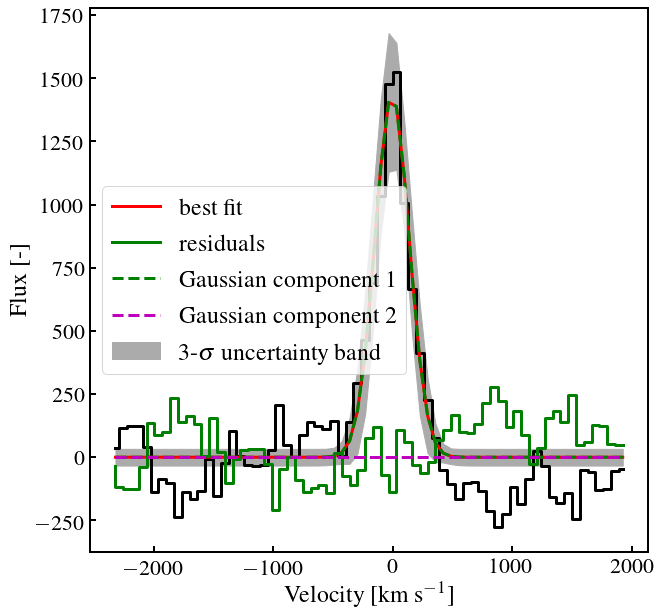

{'BIN_ID': 48, 'PixY': 123, 'PixX': 199, 'g2_centreErr': 12613969305146.416, 'g2_amplitude': 1.1090705890800192, 'g2_sigmaErr': 526233128824.46716, 'g2_ampErr': 4668057.3396267425, 'bic': 656.1533984815136, 'g2_height': 5.025835141705861e-06, 'g1_center': -6.113056218062752, 'redchi': 15617.55115406225, 'g1_ampErr': 30531.24646071934, 'g1_amplitude': 513364.3827566971, 'g2_sigma': 88036.14905676359, 'Y': -0.20000000000000015, 'X': 0.0, 'ID': 36624, 'g2_center': 244.5400664480747, 'g1_centreErr': 9.743149305735574, 'success': True, 'nfev': 117, 'g1_sigma': 142.83130822526374, 'g1_sigmaErr': 9.89260504673708, 'nvarys': 6, 'g1_fwhm': 336.3420212350156, 'g1_height': 1433.8786792601256, 'g2_fwhm': 207309.28452184805, 'ndata': 66, 'aic': 643.015470029355}
True
[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 66
    # variables        = 6
    chi-square       

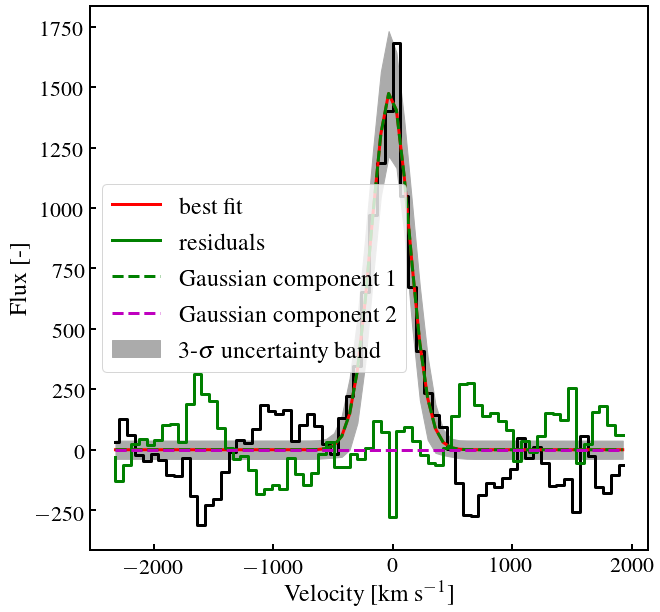

{'BIN_ID': 45, 'PixY': 123, 'PixX': 200, 'g2_centreErr': 7895141486.864557, 'g2_amplitude': 1.0152092066608362, 'g2_sigmaErr': 19825055531.286636, 'g2_ampErr': 707263.6665881056, 'bic': 663.8838894872392, 'g2_height': 3.523607354269926e-05, 'g1_center': -21.092400063481335, 'redchi': 17558.251448343563, 'g1_ampErr': 34846.89221967636, 'g1_amplitude': 589201.7868162598, 'g2_sigma': 11494.183521772262, 'Y': -0.20000000000000015, 'X': 0.20000000000000015, 'ID': 36625, 'g2_center': -244.21786059809762, 'g1_centreErr': 10.985743411765633, 'success': True, 'nfev': 145, 'g1_sigma': 158.80734749263098, 'g1_sigmaErr': 10.205014263627696, 'nvarys': 6, 'g1_fwhm': 373.9627180225973, 'g1_height': 1480.1425734252982, 'g2_fwhm': 27066.73324073976, 'ndata': 66, 'aic': 650.7459610350807}
True
[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 66
    # variables        = 6

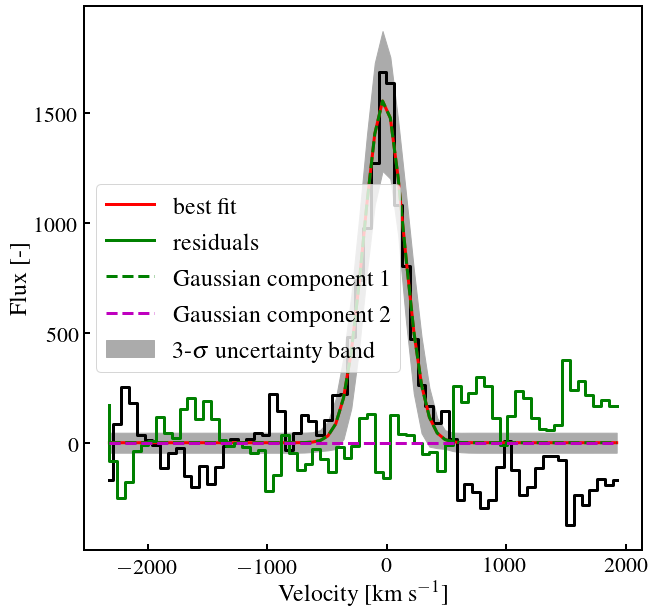

{'BIN_ID': 2034, 'PixY': 124, 'PixX': 199, 'g2_centreErr': 135922733529.48488, 'g2_amplitude': 1.0466085614006768, 'g2_sigmaErr': 58343435734.002304, 'g2_ampErr': 1885352.0423576613, 'bic': 682.5862412045807, 'g2_height': 1.6203962821107266e-05, 'g1_center': -24.368098332671508, 'redchi': 23310.245217382984, 'g1_ampErr': 41561.98265398522, 'g1_amplitude': 653392.8456328836, 'g2_sigma': 25767.5502773306, 'Y': 0.0, 'X': 0.0, 'ID': 36931, 'g2_center': -58.4704757509252, 'g1_centreErr': 12.73318383885009, 'success': True, 'nfev': 117, 'g1_sigma': 167.24753509615317, 'g1_sigmaErr': 12.0748012958742, 'nvarys': 6, 'g1_fwhm': 393.83784059512345, 'g1_height': 1558.5643429092493, 'g2_fwhm': 60677.94274406365, 'ndata': 66, 'aic': 669.4483127524221}
True
[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 127
    # data points      = 66
    # variables        = 6
    chi-square         = 1613111.

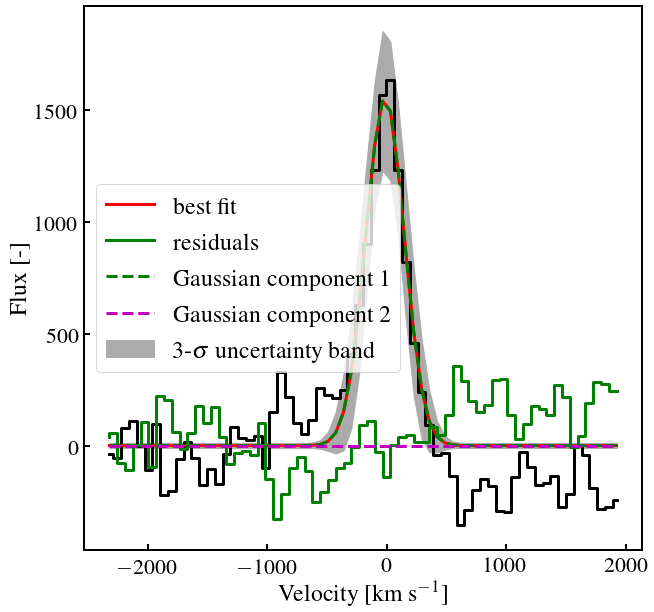

{'BIN_ID': 2146, 'PixY': 124, 'PixX': 200, 'g2_centreErr': 34563061278.30684, 'g2_amplitude': 1.00217643090236, 'g2_sigmaErr': 13470813340.220186, 'g2_ampErr': 241830.1840305819, 'bic': 692.0032904063128, 'g2_height': 2.9986435749956047e-05, 'g1_center': -14.15558415557581, 'redchi': 26885.188900845034, 'g1_ampErr': 43942.49549954173, 'g1_amplitude': 624998.70367672, 'g2_sigma': 13333.04743797584, 'Y': 0.0, 'X': 0.20000000000000015, 'ID': 36932, 'g2_center': -248.46784054088886, 'g1_centreErr': 11.65283204679242, 'success': True, 'nfev': 127, 'g1_sigma': 160.59012801793082, 'g1_sigmaErr': 12.10147428690366, 'nvarys': 6, 'g1_fwhm': 378.1608452591839, 'g1_height': 1552.6385302711078, 'g2_fwhm': 31396.92676789427, 'ndata': 66, 'aic': 678.8653619541542}
	+---------+
	 fits saved
	+---------+


In [14]:
from lmfit import Model
from lmfit.models import GaussianModel
from lmfit.model import save_modelresult


Gmod = GaussianModel()


gauss1 = GaussianModel(prefix='g1_')

pars = gauss1.make_params()

pars['g1_center'].set(value=0, min=-250, max=250)
pars['g1_sigma'].set(value=10, min=2)
pars['g1_amplitude'].set(value=2000, min=0)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-10, min=-250, max=250)
pars['g2_sigma'].set(value=40, min=0)
pars['g2_amplitude'].set(value=2000, min=1)

#gauss3 = GaussianModel(prefix='g3_')
#pars.update(gauss3.make_params())

#pars['g3_center'].set(value=-20, min=-250, max=250)
#pars['g3_sigma'].set(value=100, min=0)
#pars['g3_amplitude'].set(value=2000, min=1)

#gName = ['g1', 'g2', 'g3']
gName = ['g1', 'g2']

mod1 = gauss1 
mod2 = gauss1+gauss2
mod3 = gauss1+gauss2+gauss3

cubeSNR = resDir+'OIIICubeVradSNR.fits'

outPlot = resPlots+'OIII/'+str(i)+'_'+str(j)+'_snr-Tmp'       


inTable = resDir+'../'+GAL+'_table.fits'

outTable = resDir+'../'+GAL+'OIII_2GausFitTable.txt'

tab = fits.open(inTable)
head = tab[0].header
headTab = tab[1].header
dataTab = tab[1].data

crPix1=200 # E 
crPix2=125

head['CRPIX1'] = crPix1
head['CRPIX2'] = crPix2

ID = dataTab['ID']
BIN_ID = dataTab['BIN_ID']

Xcoord = dataTab['X']
Ycoord = dataTab['Y']

xMin = np.min(dataTab['X'])
xMax = np.max(dataTab['X'])

shapeX = (xMax-xMin)/head['PIXSIZE']

yMin = np.min(dataTab['Y'])
yMax = np.max(dataTab['Y'])

shapeY = (yMax-yMin)/head['PIXSIZE']

xAxis = (np.linspace(1, shapeX+1, shapeX+1) - head['CRPIX1']) *head['PIXSIZE']
yAxis = (np.linspace(1, shapeY+1, shapeY+1) - head['CRPIX2']) *head['PIXSIZE']


f = fits.open(cubeSNR)
hh = f[0].header
dd = f[0].data

#SNR
vel = ((np.linspace(1, dd.shape[0], dd.shape[0]) - hh['CRPIX3']) * hh['CDELT3'] + hh['CRVAL3']) /1e3 - 1760
#SNROT
#vel = ((np.linspace(1, dd.shape[0], dd.shape[0]) - hh['CRPIX3']) * hh['CDELT3'] + hh['CRVAL3']) /1e3 

diffusion = 1e-3

#create AllSpectra datacube
for j in xrange(123,125):
    for i in xrange(199,201):

#for j in xrange(0,dd.shape[1]):
#    for i in xrange(0,dd.shape[2]):
 
        y = dd[:,j,i]
           
        if np.sum(y)>0:

            xVal = xAxis[i]
            yVal = yAxis[j]

            index = np.where((Xcoord < (xVal+head['PIXSIZE']/2.)) & 
            ((xVal-head['PIXSIZE']/2.) < Xcoord) & (Ycoord < (yVal+head['PIXSIZE']/2.)) & 
            ((yVal-head['PIXSIZE']/2.) < Ycoord))


            binID = BIN_ID[index][0]
            IDName = ID[index][0]
            xx = Xcoord[index][0]
            yy = Ycoord[index][0]
            PixX = i
            PixY = j
            
            tabInfo = {'ID':IDName,'BIN_ID':binID, 'X':xx, 'Y':yy, 'PixX':PixX, 'PixY': PixY}
            
            #pars = mod3.guess(y, x=vel)
            result = mod2.fit(y, pars, x=vel)
            fitRes = result.params.valuesdict()
             
            success = result.success
            #print success
            #print result.fit_report()
            makePltGauss(vel, y,result, outPlot )
            
            #mom0[j,i] = fitRes['amplitude']
            #mom1[j,i] = fitRes['center']
     
            for k in xrange (0,len(gName)):

                amp = fitRes[gName[k]+'_amplitude']
                ctr = fitRes[gName[k]+'_center']
                sig = fitRes[gName[k]+'_sigma']

                fwhm = fitRes[gName[k]+'_fwhm']
                height = fitRes[gName[k]+'_height']


                amp_err = result.params[gName[k]+'_amplitude'].stderr
                sig_err = result.params[gName[k]+'_sigma'].stderr
                cen_err = result.params[gName[k]+'_center'].stderr            

                tabErr = {gName[k]+'_amplitude':amp, gName[k]+'_center': ctr, gName[k]+'_sigma': sig,
                          gName[k]+'_fwhm' : fwhm, gName[k]+'_height' : height,
                          gName[k]+'_centreErr':cen_err, gName[k]+'_ampErr': amp_err, 
                          gName[k]+'_sigmaErr': sig_err}

                tabInfo.update(tabErr)
    
            aic = result.aic
            bic = result.bic
            redchi = result.redchi
            success = result.success
            ndata = result.ndata
            nvarys = result.nvarys
            nfev = result.nfev

            tabFit = {'aic':aic,'bic': bic, 'ndata': ndata, 
                      'redchi': redchi, 'success': success,
                     'ndata' : ndata, 'nvarys' : nvarys,
                     'nfev': nfev}
            
            tabInfo.update(tabFit)
            print tabInfo
            #write3GaussFitTable(tabInfo,outTable)
            
        
            
        else:
            pass
        
        
#mom1[mom1==0.0] = np.nan    
#mom0[mom0==0.0] = np.nan    

    
#fits.writeto(mom0Name,mom0,hh,overwrite=True)
#fits.writeto(mom1Name,mom1,hh,overwrite=True)        
        
print '''\t+---------+\n\t fits saved\n\t+---------+'''     